In [1]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# Ï∞®Ïõê Ï∂ïÏÜå
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Íµ∞Ïßë
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

In [2]:
train_df4 = pd.read_csv(r'merge_df.csv')

### 10Ïõî

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

train_df5 = train_df4[train_df4['Í∏∞Ï§ÄÎÖÑÏõî'] == 201810]
train_df5

Í∏∞Ï§ÄÎÖÑÏõî            ID  Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏  Î≥¥Ïú†Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏  ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM  \
1200000  201810  TRAIN_000000               0             0          0   
1200001  201810  TRAIN_000001               0             0          0   
1200002  201810  TRAIN_000002               1             1          0   
1200003  201810  TRAIN_000003               1             1          0   
1200004  201810  TRAIN_000004               1             1          0   
...         ...           ...             ...           ...        ...   
1599995  201810  TRAIN_399995               1             1          0   
1599996  201810  TRAIN_399996               1             1          0   
1599997  201810  TRAIN_399997               1             1          1   
1599998  201810  TRAIN_399998               0             0          1   
1599999  201810  TRAIN_399999               0             0          1   

         ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_Î©îÏùº  ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_DM  Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨  Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©  _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°  \
1200000          0          0           -367         -367        3157   
1200001          0          0           8740         8740        9126   
1200002          0          0          12317        12317       14780   
1200003          0          0           8374         8374        8426   
1200004          1          0           2139            0           0   
...            ...        ...            ...          ...         ...   
1599995          0          0           2792            0           0   
1599996          0          0          28718        28718       30104   
1599997          1          1          19956        19956       19248   
1599998          1          1              0            0           0   
1599999          1          1          17381        17381        8823   

         Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨  _2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°  _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò  _2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò  Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©  ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  \
1200000           1           0          26           0         1         0   
1200001           1           0          37           0         1         2   
1200002           1           0          46           0         1         0   
1200003           1           0          19           0         1         0   
1200004           1           0          -2           0         0         0   
...             ...         ...         ...         ...       ...       ...   
1599995           1           0          -2           0         0         2   
1599996           1           0          65           0         1         7   
1599997           1           0          38           0         1         0   
1599998           0           0          -2           0         0         2   
1599999           2       12865          -2          47         2         3   

         ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B5M  Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M  Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M  Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M  \
1200000           0       16220       15251       15008          23647   
1200001           1        3985        2776        3117          55161   
1200002           0       24512       23325       22547          42564   
1200003           0       17246       18808       17898          10433   
1200004           0           0           0        1498          -2401   
...             ...         ...         ...         ...            ...   
1599995           1           0           0           0              0   
1599996           3       25057       14844       17435         142083   
1599997           0        9283        6862        6771          43752   
1599998           1           0           0           0              0   
1599999           2        6640        5357        3682          18877   

         Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M  Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M  Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R6M  Ïù¥Ïö©Í∏àÏï°_

In [11]:
drop_cols = [
    'ID', 'Í∏∞Ï§ÄÎÖÑÏõî', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R3M', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R6M',
    'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_R3M', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_R6M', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_R12M',
    'Ïù¥Ïö©Í±¥Ïàò_Ïò§ÌîÑÎùºÏù∏_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Ïò§ÌîÑÎùºÏù∏_R3M', 'Ïù¥Ïö©Í±¥Ïàò_Ïò§ÌîÑÎùºÏù∏_R6M',
    'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R3M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R6M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R12M',
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R6M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M',
    'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_R3M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_R6M',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M',
    'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_ÏùºÏãúÎ∂à_B1M', 'ÏûîÏï°_ÏùºÏãúÎ∂à_B2M',
    'Ï≤≠Íµ¨Í∏àÏï°_B0', 'Ï≤≠Íµ¨Í∏àÏï°_R3M', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©',
    '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò', '_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò', '_3ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°',
    'ÍµêÌÜµ_Ï£ºÏú†Ïù¥Ïö©Í∏àÏï°', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_DM', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_Î©îÏùº',
    'Ïù¥Ïö©Í∞ÄÎßπÏ†êÏàò', 'Î≥¥Ïú†Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏','_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò®ÎùºÏù∏_B0M',
    'ÏáºÌïë_ÎèÑÏÜåÎß§_Ïù¥Ïö©Í∏àÏï°','ÏáºÌïë_ÎßàÌä∏_Ïù¥Ïö©Í∏àÏï°', 'Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B5M', 'Ïù¥Ïö©Í∏àÏï°_Ïò®ÎùºÏù∏_B0M',
    '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°','_3ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°','Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B5M',
    '_2ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°','ÌèâÏûî_ÏùºÏãúÎ∂à_3M'
]

train_df6 = train_df5.drop(columns=drop_cols)


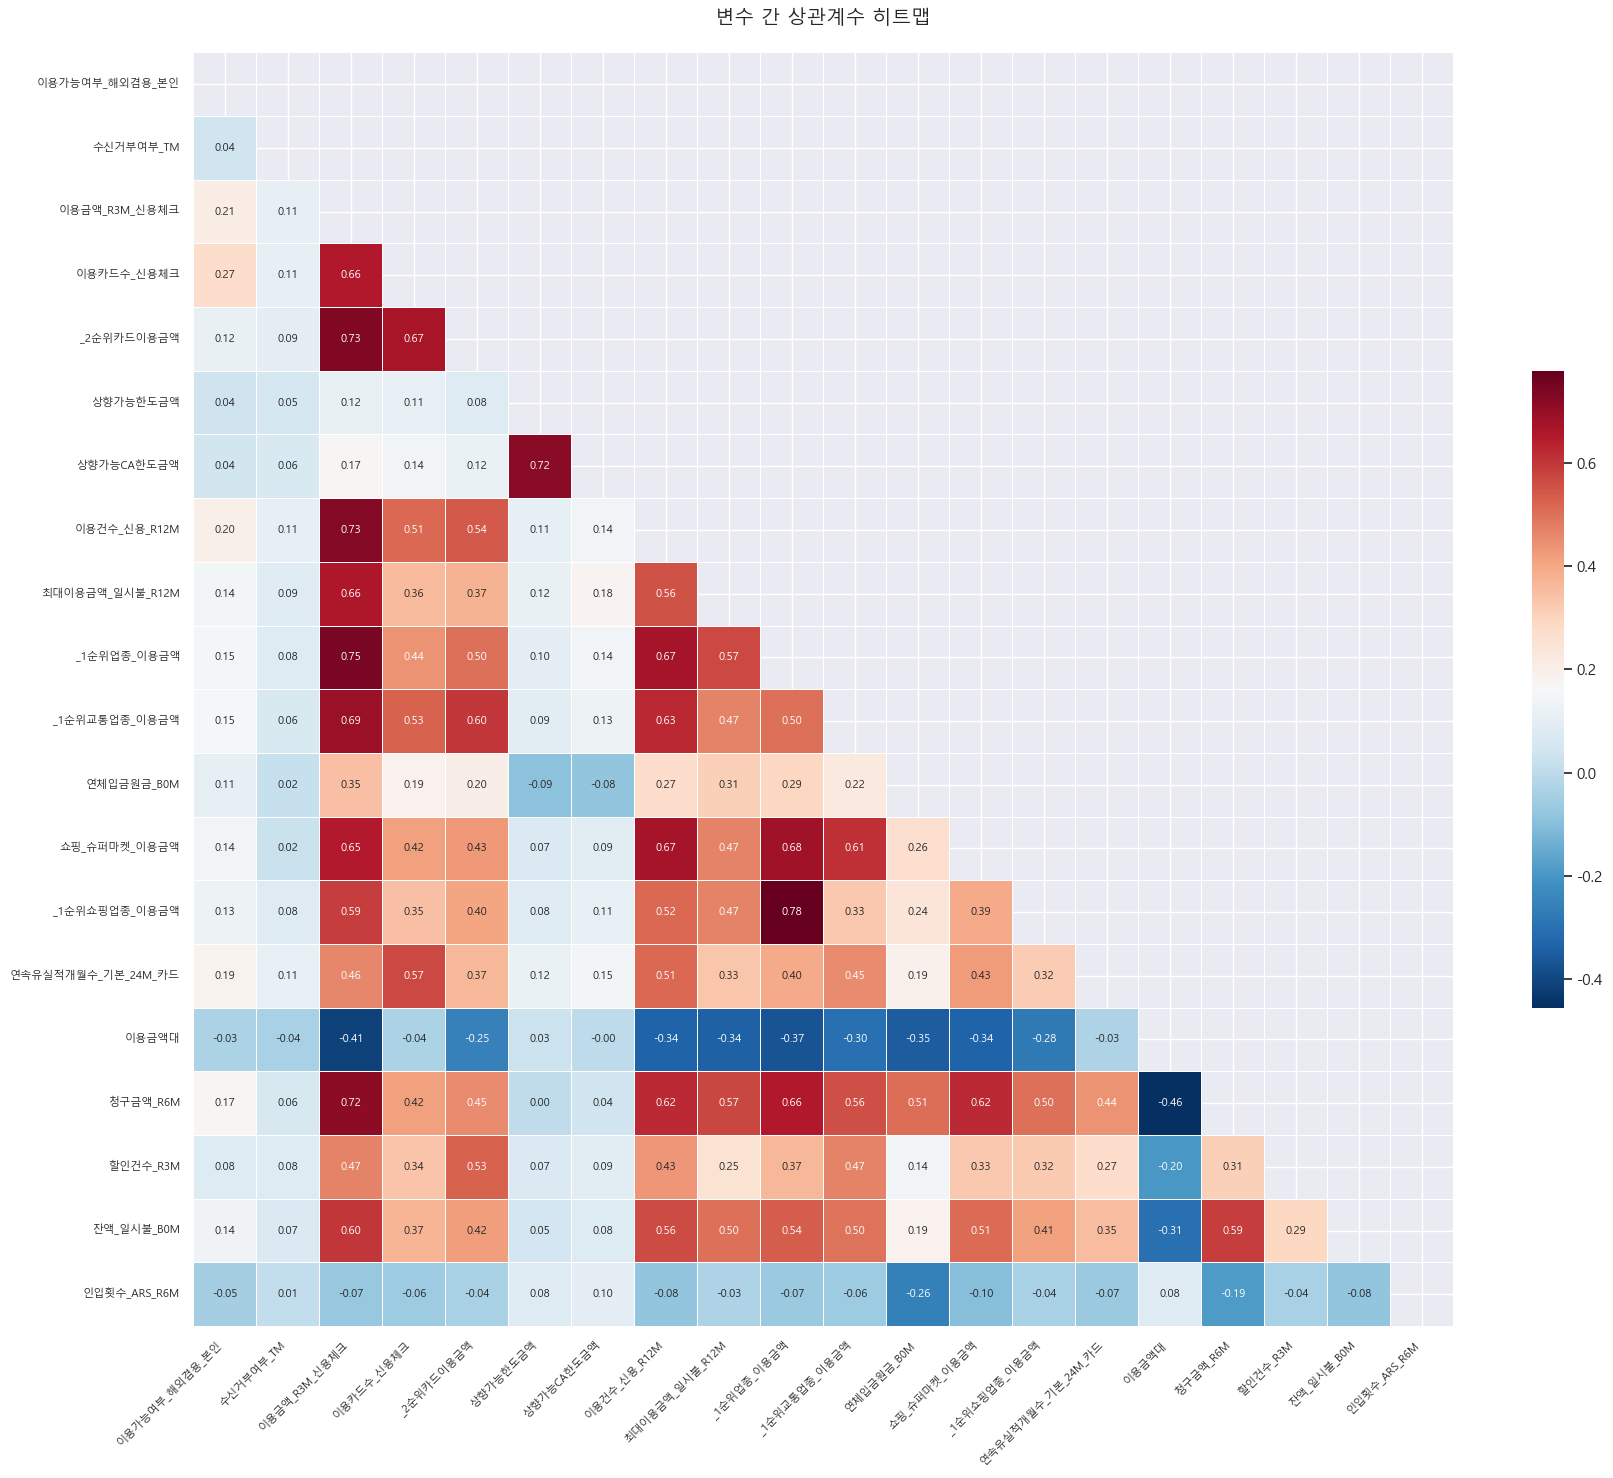

In [5]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr = train_df6.corr()

# ÏÉÅÏÇºÍ∞ÅÌòï ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± (Ï§ëÎ≥µ Ï†úÍ±∞Ïö©)
mask = np.triu(np.ones_like(corr, dtype=bool))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(18, 15))  # üí° ÌÅ¨Í∏∞ ÌÇ§ÏõÄ
sns.heatmap(
    corr,
    mask=mask,
    cmap='RdBu_r',        # üí° Ïª¨Îü¨Îßµ Î≥ÄÍ≤Ω (Îçî ÏßÅÍ¥ÄÏ†Å)
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8}, # üí° Í∏ÄÏî® ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}  # üí° Ïª¨Îü¨Î∞î ÌÅ¨Í∏∞ Ï°∞Ï†à
)

# Ï∂ï Í∏ÄÏî® ÌöåÏ†Ñ
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.title("Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# vif ÌëúÎ•º Ï∂úÎ†•Ìïú ÌõÑ vif Í≥ÑÏàòÍ∞Ä ÎÜíÎã§Í≥† ÏÉùÍ∞ÅÎêòÎäî Ïª¨ÎüºÎì§ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Í≥ÑÏÜç ÎèåÎ†§Î≥¥ÏöîÏöî
# vif_X = train_df2.drop(['Transported'], axis=1)
# vif_X = train_df2.drop(['Transported', 'NumberInGroup'], axis=1)
vif_X21 = train_df6.copy()

# vifÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉÅÏàòÌï≠ÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
vif_X22 = sm.add_constant(vif_X21)

vif_X22

const  Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏  ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM  Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨  Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨  \
1200000    1.0               0          0           -367           1   
1200001    1.0               0          0           8740           1   
1200002    1.0               1          0          12317           1   
1200003    1.0               1          0           8374           1   
1200004    1.0               1          0           2139           1   
...        ...             ...        ...            ...         ...   
1599995    1.0               1          0           2792           1   
1599996    1.0               1          0          28718           1   
1599997    1.0               1          1          19956           1   
1599998    1.0               0          1              0           0   
1599999    1.0               0          1          17381           2   

         _2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°  ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R12M  ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M  \
1200000           0         0           0           162             5901   
1200001           0         2           1           180            12774   
1200002           0         0           0           161             4300   
1200003           0         0           0            67             5315   
1200004           0         0           0            -1               76   
...             ...       ...         ...           ...              ...   
1599995           0         2           1             0                0   
1599996           0         7           3           259            28034   
1599997           0         0           0           162             6125   
1599998           0         2           1             0                0   
1599999       12865         3           2            34             6091   

         _1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°  _1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°  Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B0M  ÏáºÌïë_ÏäàÌçºÎßàÏºì_Ïù¥Ïö©Í∏àÏï°  _1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°  \
1200000         2020            212        7958             0              0   
1200001         2256           1328           0           530            628   
1200002        10012           1151        7761           608           1853   
1200003         2746            200        9405           823            914   
1200004            0              0           0             0              0   
...              ...            ...         ...           ...            ...   
1599995            0              0           0             0              0   
1599996         7813            551        4080           769           1437   
1599997         4087           1818         755           418           1388   
1599998            0              0           0             0              0   
1599999         3586              0        2184             0           1019   

         Ïó∞ÏÜçÏú†Ïã§Ï†ÅÍ∞úÏõîÏàò_Í∏∞Î≥∏_24M_Ïπ¥Îìú  Ïù¥Ïö©Í∏àÏï°ÎåÄ  Ï≤≠Íµ¨Í∏àÏï°_R6M  Ìï†Ïù∏Í±¥Ïàò_R3M  ÏûîÏï°_ÏùºÏãúÎ∂à_B0M  \
1200000                  17      0     92304         0         705   
1200001                  12      1     20057         0        2669   
1200002                   8      0    163633         0        5176   
1200003                   8      0    122052         0        1365   
1200004                   0      2         0         0           0   
...                     ...    ...       ...       ...         ...   
1599995                   0      2         0         0           0   
1599996                  17      0    125940         0        3933   
1599997                  24      4     38029         0        2421   
1599998                   0      2         0         0           0   
1599999                   5      1     23976         0        1171   

         Ïù∏ÏûÖÌöüÏàò_ARS_R6M  
1200000             0  
1200001             1  
1200002             1  
1200003             0  
12000

In [7]:
vif_X22.columns

Index(['const', 'Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨',
       '_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', 'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°', 'ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R12M',
       'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', '_1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', '_1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B0M',
       'ÏáºÌïë_ÏäàÌçºÎßàÏºì_Ïù¥Ïö©Í∏àÏï°', '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïó∞ÏÜçÏú†Ïã§Ï†ÅÍ∞úÏõîÏàò_Í∏∞Î≥∏_24M_Ïπ¥Îìú', 'Ïù¥Ïö©Í∏àÏï°ÎåÄ',
       'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'Ìï†Ïù∏Í±¥Ïàò_R3M', 'ÏûîÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù∏ÏûÖÌöüÏàò_ARS_R6M'],
      dtype='object')

In [8]:
# vifÎ•º Í≥ÑÏÇ∞ÌïúÎã§.
vif2 = pd.DataFrame()
vif2['Î≥ÄÏàò'] = vif_X22.columns
vif2['VIF'] = [variance_inflation_factor(vif_X22.values, i) for i in range(vif_X22.shape[1])]
vif2

Î≥ÄÏàò        VIF
0                const  47.372736
1       Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏   1.108376
2            ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM   1.030264
3        Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨   6.528658
4           Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨   2.862047
5           _2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°   3.043262
6             ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°   2.063501
7           ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°   2.125523
8         Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R12M   2.941931
9      ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M   2.060330
10         _1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°   5.114396
11       _1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°   2.503710
12          Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B0M   1.516903
13        ÏáºÌïë_ÏäàÌçºÎßàÏºì_Ïù¥Ïö©Í∏àÏï°   2.831003
14       _1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°   2.894736
15  Ïó∞ÏÜçÏú†Ïã§Ï†ÅÍ∞úÏõîÏàò_Í∏∞Î≥∏_24M_Ïπ¥Îìú   1.820578
16               Ïù¥Ïö©Í∏àÏï°ÎåÄ   1.544682
17            Ï≤≠Íµ¨Í∏àÏï°_R6M   3.186102
18            Ìï†Ïù∏Í±¥Ïàò_R3M   1.523666
19          ÏûîÏï°_ÏùºÏãúÎ∂à_B0M   1.847012
20        Ïù∏ÏûÖÌöüÏàò_ARS_R6M   1.100626

In [9]:
pd.set_option('display.max_rows', None)
vif_sorted2 = vif2.sort_values(by='VIF', ascending=False)
display(vif_sorted2)

Î≥ÄÏàò        VIF
0                const  47.372736
3        Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨   6.528658
10         _1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°   5.114396
17            Ï≤≠Íµ¨Í∏àÏï°_R6M   3.186102
5           _2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°   3.043262
8         Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R12M   2.941931
14       _1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°   2.894736
4           Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨   2.862047
13        ÏáºÌïë_ÏäàÌçºÎßàÏºì_Ïù¥Ïö©Í∏àÏï°   2.831003
11       _1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°   2.503710
7           ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°   2.125523
6             ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°   2.063501
9      ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M   2.060330
19          ÏûîÏï°_ÏùºÏãúÎ∂à_B0M   1.847012
15  Ïó∞ÏÜçÏú†Ïã§Ï†ÅÍ∞úÏõîÏàò_Í∏∞Î≥∏_24M_Ïπ¥Îìú   1.820578
16               Ïù¥Ïö©Í∏àÏï°ÎåÄ   1.544682
18            Ìï†Ïù∏Í±¥Ïàò_R3M   1.523666
12          Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B0M   1.516903
1       Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏   1.108376
20        Ïù∏ÏûÖÌöüÏàò_ARS_R6M   1.100626
2            ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM   1.030264

In [10]:
vif_sorted2.to_csv('VIF10_7.csv', index=False, encoding='utf-8-sig')

In [12]:
train_df6.to_csv('train.csv', index=False, encoding='utf-8-sig')